In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [123]:
from sklearn import metrics
import seaborn as sns
import seaborn as sn 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [124]:


from sklearn.model_selection import GridSearchCV

In [125]:
# Load data
df = pd.read_csv('Titanic-Dataset.csv')  # Specify the path to your file
df.info()
df.tail(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [126]:
# Drop unnecessary columns
final_data = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')
if 'Age' in final_data.columns:
    final_data['Age'] = final_data['Age'].fillna(150) #Try to fill with unusial value

#final_data = final_data.dropna(subset=['Age']) #!!!!! NEW BE CAREFUL!!!
# Fill missing values
#if 'Age' in final_data.columns:
 #   final_data['Age'] = final_data['Age'].fillna(final_data['Age'].mean())
if 'Embarked' in final_data.columns:
    final_data['Embarked'] = final_data['Embarked'].fillna(final_data['Embarked'].mode()[0])
final_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,150.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [127]:
# Encode categorical columns
if 'Sex' in final_data.columns:
    final_data['Sex'] = final_data['Sex'].map({'male': 1, 'female': 0})
if 'Embarked' in df.columns:
    final_data = pd.get_dummies(final_data, columns=['Embarked'], drop_first=True)

In [128]:
#check new data frame
final_data.info()
final_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True
5,0,3,1,150.0,0,0,8.4583,True,False
6,0,1,1,54.0,0,0,51.8625,False,True
7,0,3,1,2.0,3,1,21.0750,False,True
8,1,3,0,27.0,0,2,11.1333,False,True
9,1,2,0,14.0,1,0,30.0708,False,False


In [129]:

final_data = final_data.astype({'Embarked_Q': 'bool'}).replace({True: 1, False: 0})

final_data = final_data.astype({'Embarked_S': 'bool'}).replace({True: 1, False: 0})
# Define features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex','Embarked_Q','Embarked_Q']
#if 'Embarked_Q' in df.columns:
    #features.append('Embarked_Q')
#if 'Embarked_S' in df.columns:
    #features.append('Embarked_S')
target = 'Survived'

C:\Users\shvve\AppData\Local\Temp\ipykernel_40492\1952617420.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data = final_data.astype({'Embarked_Q': 'bool'}).replace({True: 1, False: 0})
C:\Users\shvve\AppData\Local\Temp\ipykernel_40492\1952617420.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data = final_data.astype({'Embarked_S': 'bool'}).replace({True: 1, False: 0})


In [130]:
#check new data frame
final_data.info()
final_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
5,0,3,1,150.0,0,0,8.4583,1,0
6,0,1,1,54.0,0,0,51.8625,0,1
7,0,3,1,2.0,3,1,21.0750,0,1
8,1,3,0,27.0,0,2,11.1333,0,1
9,1,2,0,14.0,1,0,30.0708,0,0


In [131]:
columns = [col for col in final_data.columns]

for col in columns:
    print("\n",final_data[col].value_counts(),"\n")


 Survived
0    549
1    342
Name: count, dtype: int64 


 Pclass
3    491
1    216
2    184
Name: count, dtype: int64 


 Sex
1    577
0    314
Name: count, dtype: int64 


 Age
150.00    177
24.00      30
22.00      27
18.00      26
28.00      25
         ... 
24.50       1
0.67        1
0.42        1
34.50       1
74.00       1
Name: count, Length: 89, dtype: int64 


 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 


 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 


 Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64 


 Embarked_Q
0    814
1     77
Name: count, dtype: int64 


 Embarked_S
1    646
0    245
Name: count, dtype: int64 



In [209]:
Pclass_counts = final_data['Pclass'].value_counts()
survived_by_class = final_data.groupby('Pclass')['Survived'].sum()

print(survived_by_class/Pclass_counts*100)


Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


In [212]:
# Filter rows where 'Age' is less than 10
ages_less_than_10 = final_data[final_data['Age'] < 10]

# Display the counts of these ages
age_counts_less_than_10 = ages_less_than_10['Age'].value_counts()
print(age_counts_less_than_10)

Age
2.00    10
4.00    10
9.00     8
1.00     7
3.00     6
8.00     4
5.00     4
7.00     3
6.00     3
0.83     2
0.75     2
0.92     1
0.67     1
0.42     1
Name: count, dtype: int64


In [133]:
fare_stats = final_data["Fare"].describe()
fare_stats

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [134]:
# Split data into train/test (80/20)
X = final_data[features]
y = final_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

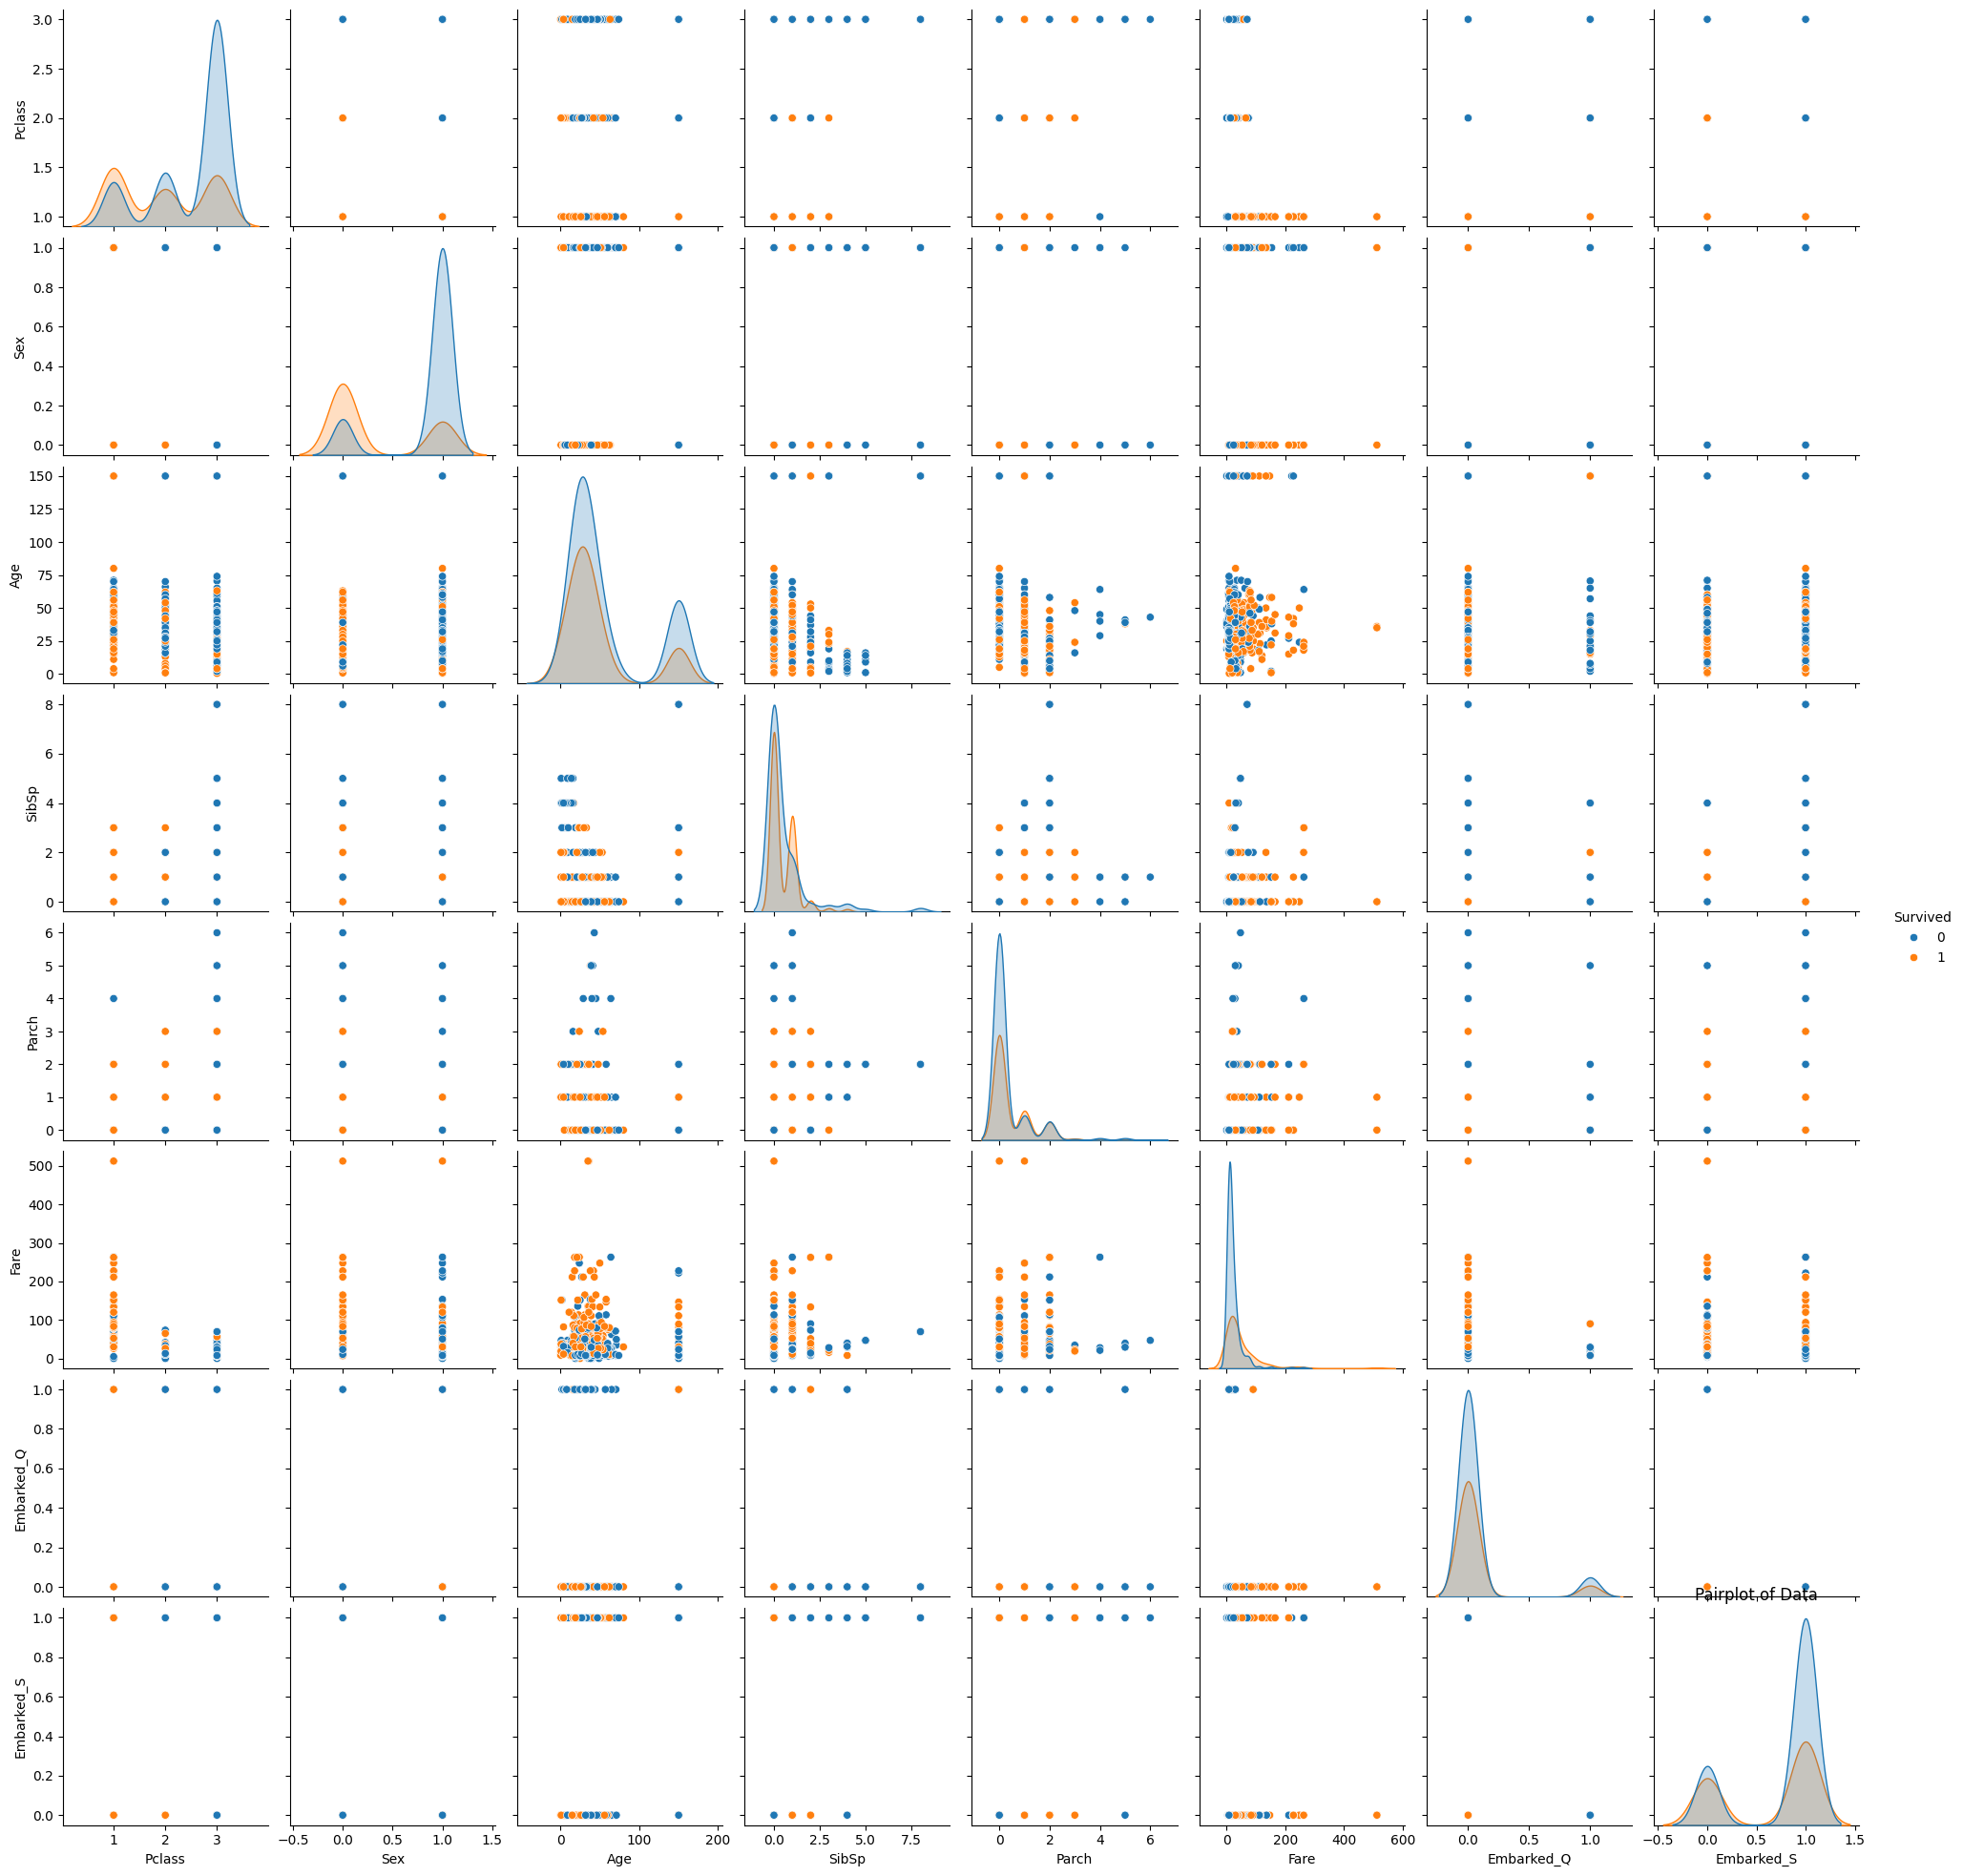

In [135]:
sns.pairplot(data=final_data, hue="Survived")
plt.title('Pairplot of Data')
plt.show()

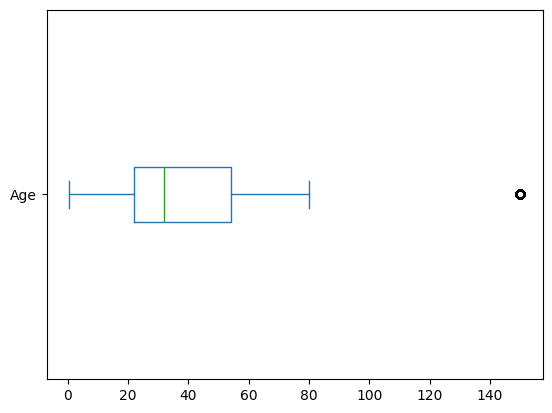

In [136]:
ax=final_data.plot.box(vert=False, column='Age')

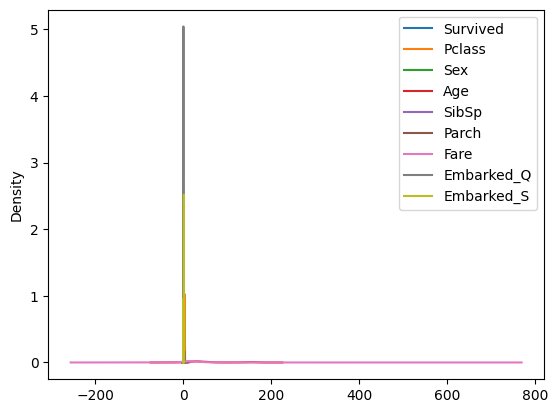

In [137]:
ax=final_data.plot.kde()

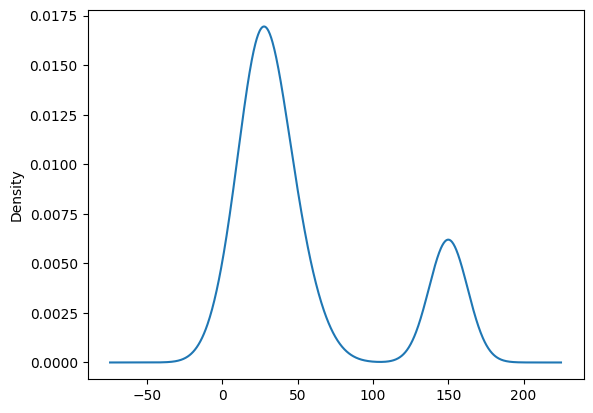

In [138]:
final_data.Age.plot.kde();


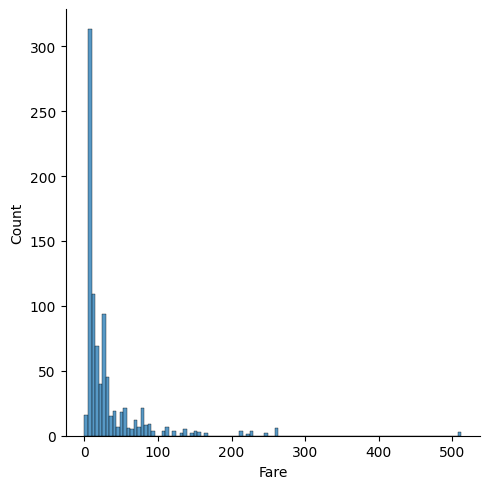

In [139]:
sns.displot(df.Fare);

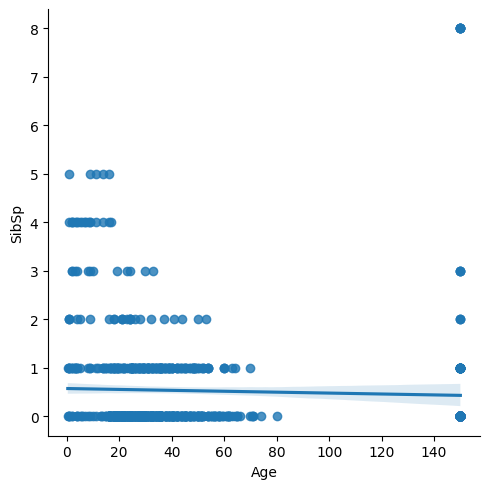

In [140]:
sns.lmplot(x = "Age", y = "SibSp", data=final_data)
plt.show()

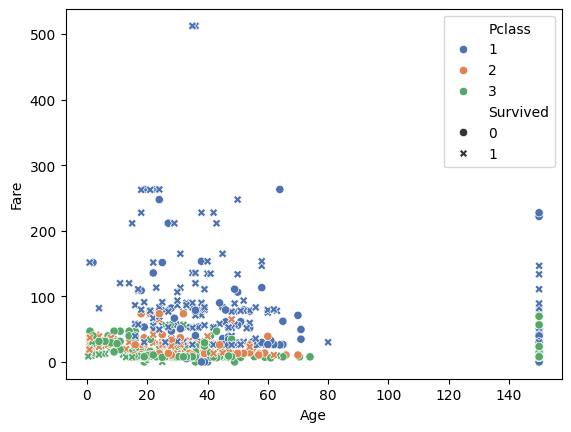

In [141]:
sns.scatterplot(x = "Age", y = "Fare", hue="Pclass",style = "Survived",palette= 'deep', data = final_data);

<Axes: xlabel='Age', ylabel='Survived'>

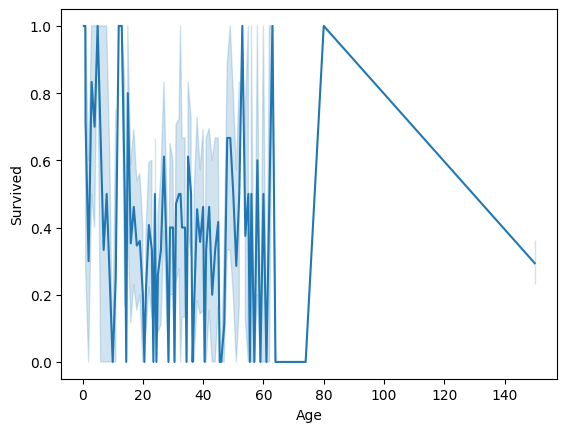

In [142]:
sns.lineplot(x = "Age", y = "Survived", data = final_data)

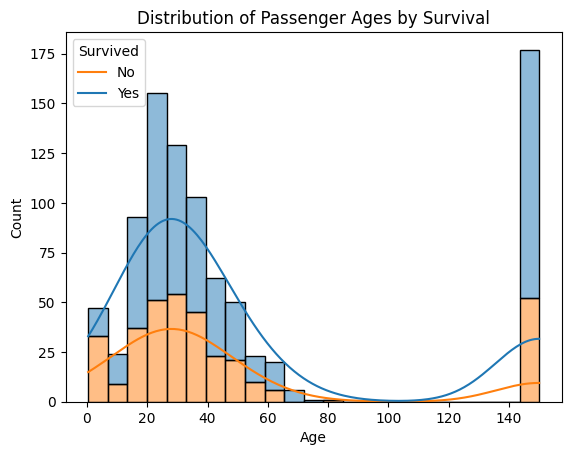

In [143]:
# Histogram showing the distribution of passenger ages, separated by survivors and non-survivors
hist_plot = sns.histplot(data=final_data, x='Age', hue='Survived', multiple='stack', kde=True)
hist_plot.set(xlabel='Age', ylabel='Count', title='Distribution of Passenger Ages by Survival')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\Pyt

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


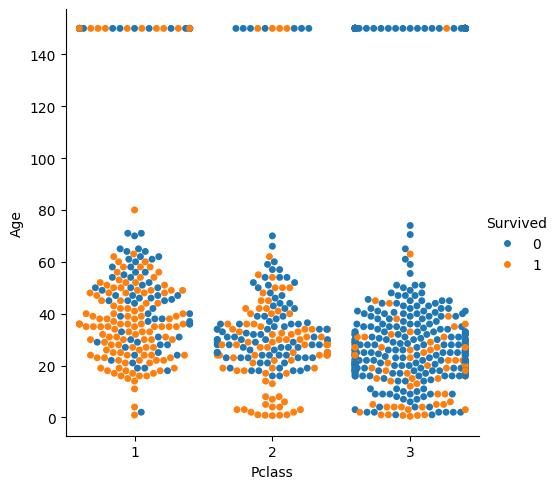

In [144]:
sns.catplot(data=final_data, kind="swarm", x="Pclass", y="Age", hue="Survived")

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shvve\AppData\Local\Packages\Py

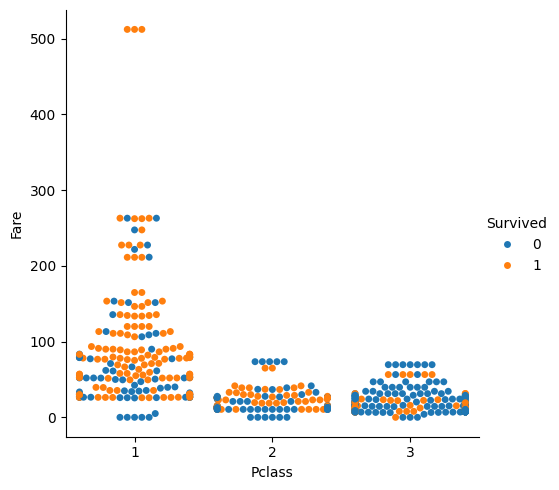

In [145]:
sns.catplot(data=final_data, kind="swarm", x="Pclass", y="Fare", hue="Survived")

In [146]:
# Logistic Regression for not scaled data 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [147]:
final_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,150.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,0,0


In [148]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



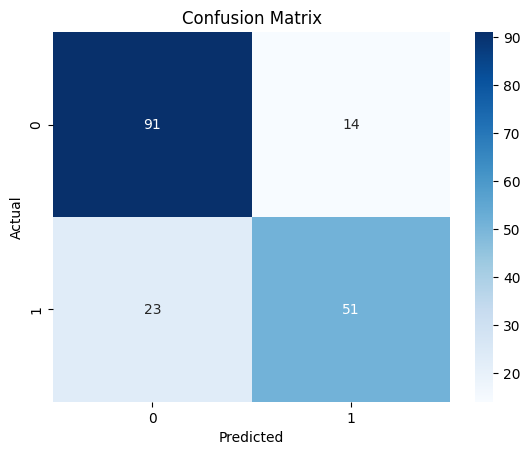

In [149]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
scaled_data=MinMaxScaler().fit_transform(final_data)

In [151]:
scaled_data


array([[0.        , 1.        , 1.        , ..., 0.01415106, 0.        ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.13913574, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.01546857, 0.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.04577135, 0.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.0585561 , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.01512699, 1.        ,
        0.        ]], shape=(891, 9))

In [152]:
scaled_data=pd.DataFrame(scaled_data)

In [153]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    float64
 1   1       891 non-null    float64
 2   2       891 non-null    float64
 3   3       891 non-null    float64
 4   4       891 non-null    float64
 5   5       891 non-null    float64
 6   6       891 non-null    float64
 7   7       891 non-null    float64
 8   8       891 non-null    float64
dtypes: float64(9)
memory usage: 62.8 KB


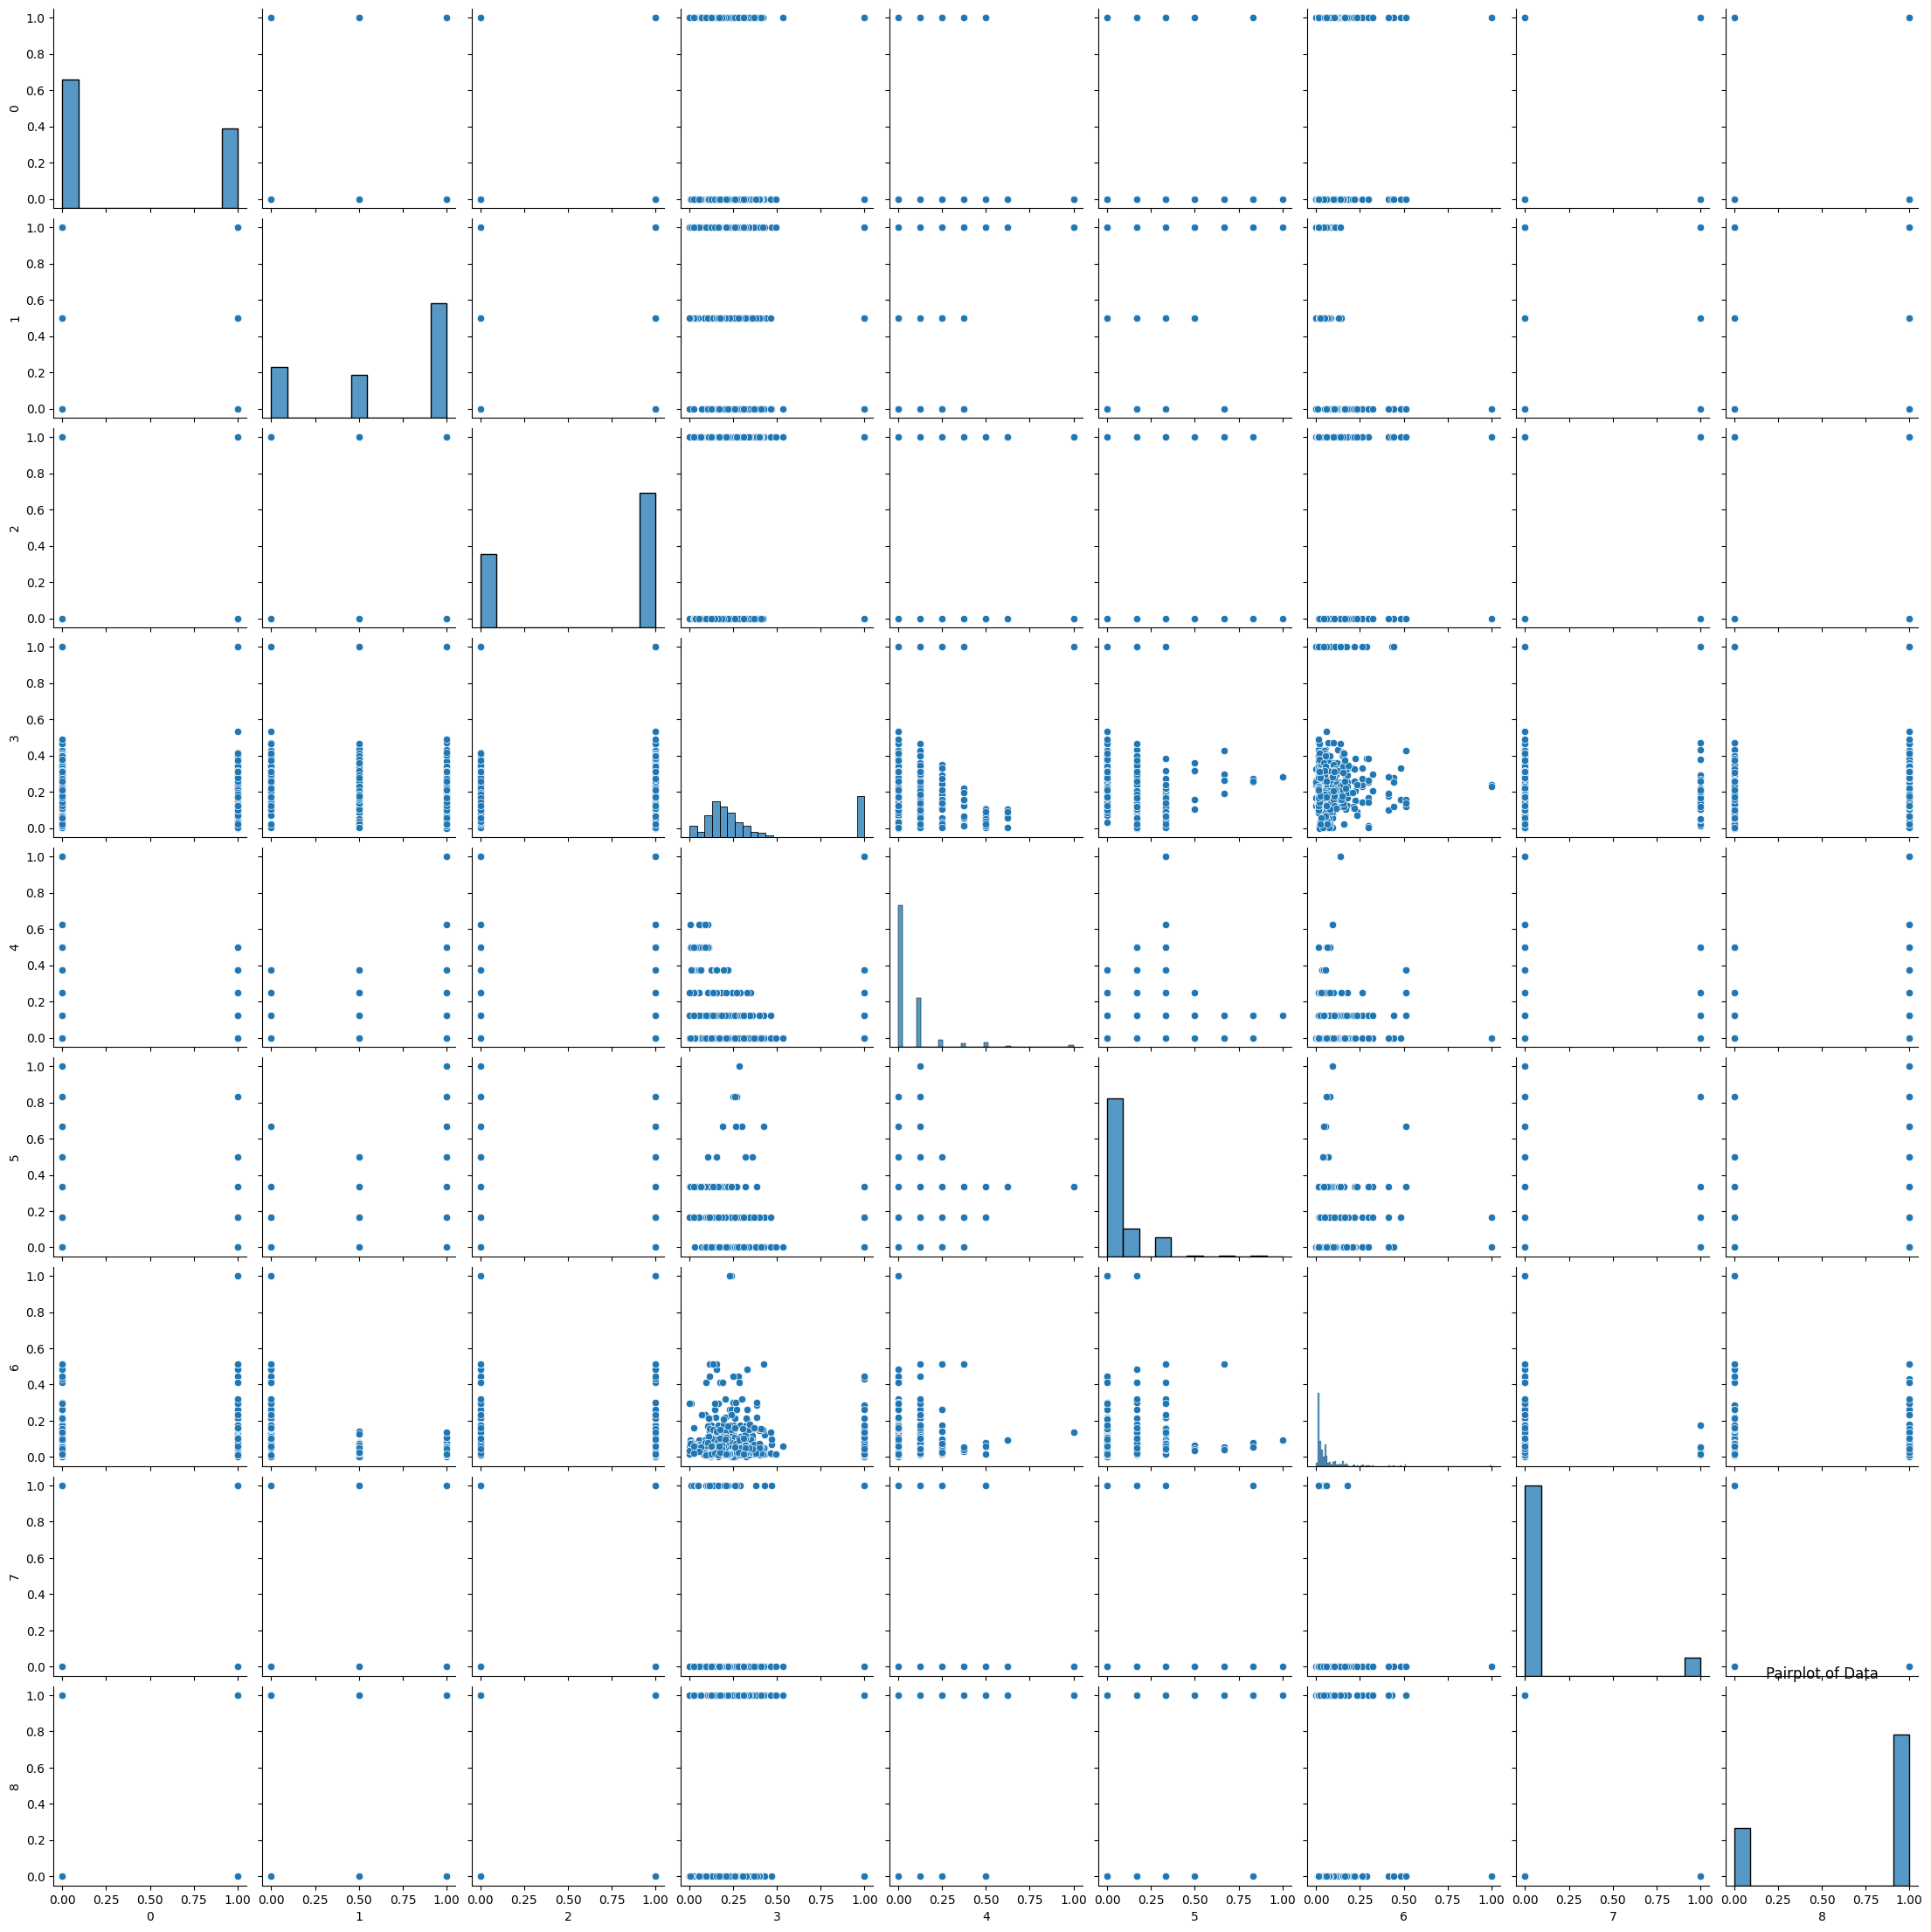

In [154]:
sns.pairplot(scaled_data)
plt.title('Pairplot of Data')
plt.show()

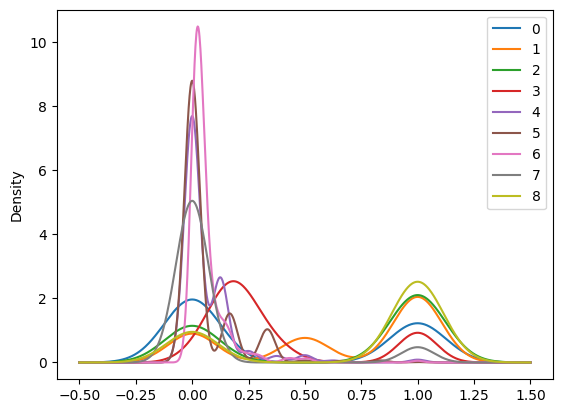

In [155]:
ax=scaled_data.plot.kde()

In [156]:
scaled_data.tail()


,0,1,2,3,4,5,6,7,8
886,0.0,0.5,1.0,0.177698,0.000,0.000000,0.025374,0.0,1.0
887,1.0,0.0,0.0,0.124214,0.000,0.000000,0.058556,0.0,1.0
888,0.0,1.0,0.0,1.000000,0.125,0.333333,0.045771,0.0,1.0
889,1.0,0.0,1.0,0.171012,0.000,0.000000,0.058556,0.0,0.0
890,0.0,1.0,1.0,0.211124,0.000,0.000000,0.015127,1.0,0.0


In [157]:
#scaled_data.columns=['Survived',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_Q',	'Embarked_S']

In [158]:
features1 = [1,2,3,4,5,6,7,8]
target1 = [0]

print (scaled_data[features1])
print (scaled_data[target1])

       1    2         3      4         5         6    7    8
0    1.0  1.0  0.144271  0.125  0.000000  0.014151  0.0  1.0
1    0.0  0.0  0.251237  0.125  0.000000  0.139136  0.0  0.0
2    1.0  0.0  0.171012  0.000  0.000000  0.015469  0.0  1.0
3    0.0  0.0  0.231181  0.125  0.000000  0.103644  0.0  1.0
4    1.0  1.0  0.231181  0.000  0.000000  0.015713  0.0  1.0
..   ...  ...       ...    ...       ...       ...  ...  ...
886  0.5  1.0  0.177698  0.000  0.000000  0.025374  0.0  1.0
887  0.0  0.0  0.124214  0.000  0.000000  0.058556  0.0  1.0
888  1.0  0.0  1.000000  0.125  0.333333  0.045771  0.0  1.0
889  0.0  1.0  0.171012  0.000  0.000000  0.058556  0.0  0.0
890  1.0  1.0  0.211124  0.000  0.000000  0.015127  1.0  0.0

[891 rows x 8 columns]
       0
0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
..   ...
886  0.0
887  1.0
888  0.0
889  1.0
890  0.0

[891 rows x 1 columns]


In [159]:
# Split data into train/test (80/20)
X1 = scaled_data[features1]
y1 = scaled_data[target1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [160]:
#print(scaled_data.colums[0])
print(X1_train.shape)
print(X1_test.shape)
print(X1_train)

(712, 8)
(179, 8)
       1    2         3      4         5         6    7    8
331  0.0  1.0  0.301377  0.000  0.000000  0.055628  0.0  1.0
733  0.5  1.0  0.150956  0.000  0.000000  0.025374  0.0  1.0
382  1.0  1.0  0.211124  0.000  0.000000  0.015469  0.0  1.0
704  1.0  1.0  0.171012  0.125  0.000000  0.015330  0.0  1.0
813  1.0  0.0  0.037304  0.500  0.333333  0.061045  0.0  1.0
..   ...  ...       ...    ...       ...       ...  ...  ...
106  1.0  0.0  0.137585  0.000  0.000000  0.014932  0.0  1.0
270  0.0  1.0  1.000000  0.000  0.000000  0.060508  0.0  1.0
860  1.0  1.0  0.271293  0.250  0.000000  0.027538  0.0  1.0
435  0.0  0.0  0.090788  0.125  0.333333  0.234224  0.0  1.0
102  0.0  1.0  0.137585  0.000  0.166667  0.150855  0.0  1.0

[712 rows x 8 columns]


In [161]:
y1_train = y1_train.values.ravel()
y1_test = y1_test.values.ravel()

In [162]:
# Logistic Regression for scaled data 
model1 = LogisticRegression(max_iter=10000)
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

In [163]:
# scaled Model evaluation
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       105
         1.0       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



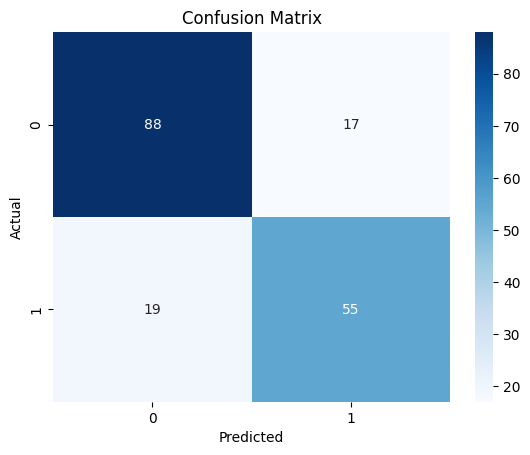

In [164]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0.6166023166023165 0.4676962676962677


C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


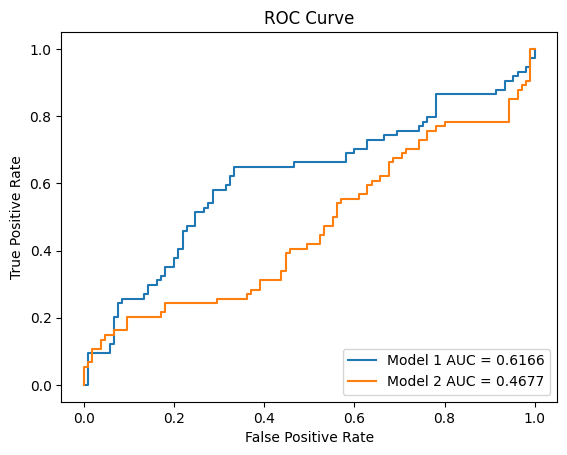

In [165]:
# Use predict_proba to get probabilities for the positive class
y1_prob = model.predict_proba(X1_test)[:, 1]
y_prob=model1.predict_proba(X_test)[:, 1]
# Compute ROC curve
fpr, tpr, _ = metrics.roc_curve(y1_test, y1_prob)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_prob)
# Compute AUC
auc = metrics.roc_auc_score(y1_test, y1_prob)
auc1 = metrics.roc_auc_score(y_test, y_prob)
print(auc,auc1)
# Plot ROC curve
plt.plot(fpr, tpr, label="Model 1 AUC = " + str(round(auc, 4)))
plt.plot(fpr1, tpr1, label="Model 2 AUC = " + str(round(auc1, 4)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

In [166]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (179, 8)
y_test shape: (179,)


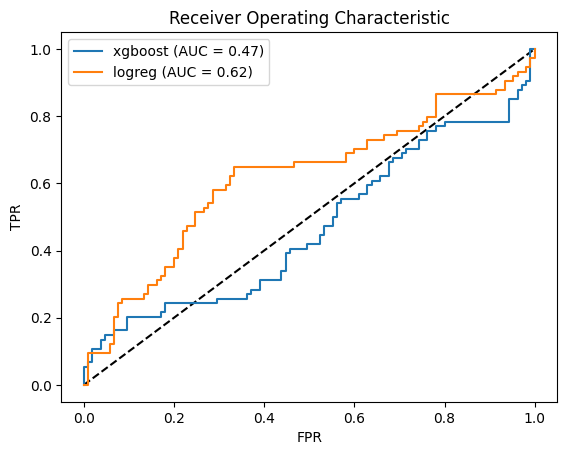

In [167]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label="xgboost (AUC = %0.2f)" % auc1)
plt.plot(fpr, tpr, label="logreg (AUC = %0.2f)" % auc)

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [168]:
print(model.score(X, y))

print(model1.score(X1, y1))

0.7991021324354658
0.7991021324354658


One Data Analisis 

In [169]:
# Data preprocessing
one_data  = final_data
one_data['Pclass'] = one_data['Pclass'].replace(0, 0.1) 
one_data['Fare'] = one_data['Fare'].replace(0, 0.1)
features2 = [ 'Pclass']
features3 = [ 'Fare']
target2='Survived'
target3='Survived'


In [170]:
# Split data into train/test (80/20)
X2 = one_data[features2]
y2 = one_data[target2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [171]:
# Split data into train/test (80/20)
X3 = one_data[features3]
y3 = one_data[target3]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

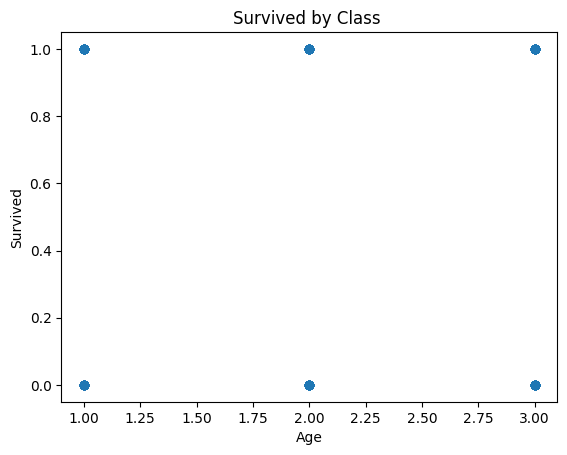

In [172]:
# Exploratory Data Analysis
plt.scatter(X2, y2, alpha=0.1)
plt.title('Survived by Class ')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

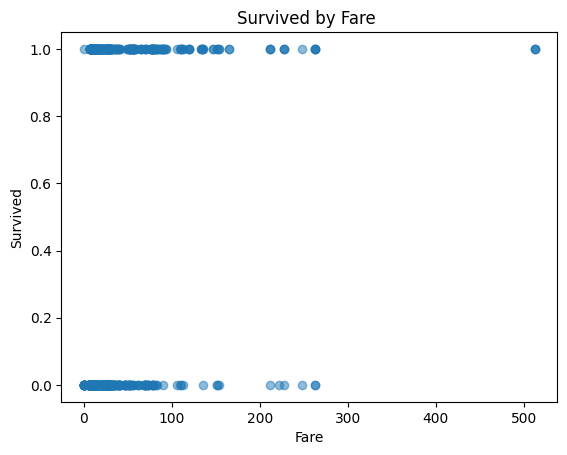

In [173]:
# Exploratory Data Analysis
plt.scatter(X3, y3, alpha=0.5)
plt.title('Survived by Fare ')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

In [174]:
# Logistic Regression for one variable

model2 = LogisticRegression(max_iter=1000)
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

In [175]:
# Logistic Regression for one variable
model3 = LogisticRegression(max_iter=1000)
model3.fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)

In [176]:
# Model evaluation
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy2)
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.7039106145251397
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



In [177]:
# Model evaluation
accuracy3 = accuracy_score(y2_test, y3_pred)
print("Accuracy:", accuracy3)
print("Classification Report:\n", classification_report(y2_test, y3_pred))

Accuracy: 0.6536312849162011
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.76       105
           1       0.77      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.70      0.59      0.56       179
weighted avg       0.69      0.65      0.59       179



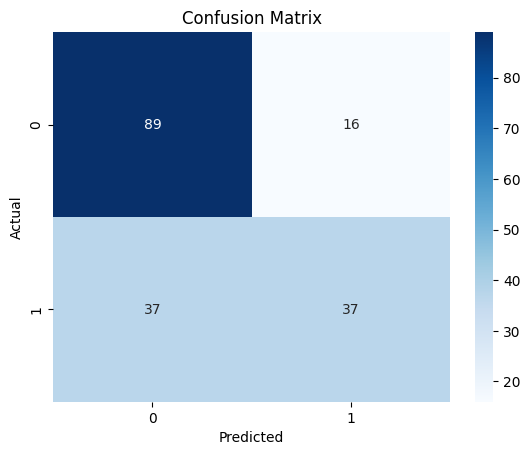

In [178]:
# Plot confusion matrix
conf_matrix2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

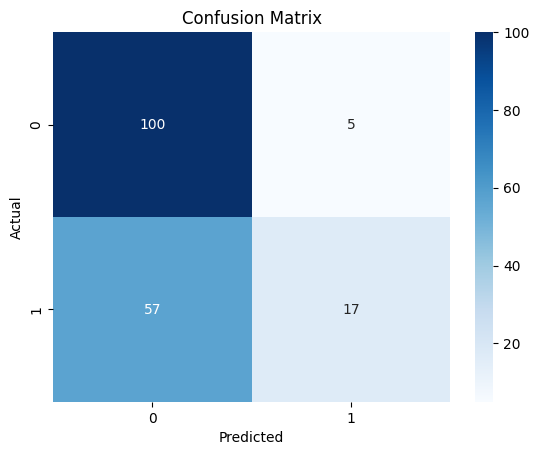

In [179]:
# Plot confusion matrix
conf_matrix3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [180]:

print(model1.score(X1, y1))

print(model2.score(X2, y2))

print(model3.score(X3, y3))

0.7991021324354658
0.6790123456790124
0.6632996632996633


Grid Search

In [181]:
for C_value in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(C=C_value, solver='liblinear')  # 'liblinear' is suitable for smaller datasets
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy with C={C_value}: {accuracy:.4f}")

    # Print coefficients to observe the effect of regularization
    print(f"Coefficients with C={C_value}: {model.coef_}\n")
    print(model.score(X, y))

Accuracy with C=0.01: 0.7039
Coefficients with C=0.01: [[-0.15244907 -0.00379173 -0.12518053  0.02288562  0.01129811 -0.55992778
   0.04504551  0.04504551]]

0.7104377104377104
Accuracy with C=0.1: 0.7933
Coefficients with C=0.1: [[-0.21465175 -0.00313119 -0.22108619 -0.03933396  0.01059768 -1.72059502
   0.11999983  0.11999983]]

0.7946127946127947
Accuracy with C=1: 0.7933
Coefficients with C=1: [[-0.62703168 -0.00474171 -0.25357468 -0.10866723  0.00513713 -2.49101649
   0.20393043  0.20393043]]

0.7968574635241302
Accuracy with C=10: 0.7933
Coefficients with C=10: [[-0.77547222 -0.00543786 -0.26357887 -0.1297404   0.00360701 -2.69627176
   0.22829201  0.22829201]]

0.7991021324354658
Accuracy with C=100: 0.7933
Coefficients with C=100: [[-0.7956971  -0.005586   -0.26587811 -0.13063011  0.00342873 -2.71883453
   0.24596094  0.24596094]]

0.7991021324354658


In [182]:
#Grid Seach 

Features4=scaled_data.drop(columns=0)
target4=scaled_data[0]
Features5=final_data.drop(columns='Survived')
#Features5=final_data.drop(columns='Embarked_Q')
#Features5=final_data.drop(columns='Embarked_S')
target5=final_data['Survived']
print(Features4) #scaled
print(Features5) #not scaled

       1    2         3      4         5         6    7    8
0    1.0  1.0  0.144271  0.125  0.000000  0.014151  0.0  1.0
1    0.0  0.0  0.251237  0.125  0.000000  0.139136  0.0  0.0
2    1.0  0.0  0.171012  0.000  0.000000  0.015469  0.0  1.0
3    0.0  0.0  0.231181  0.125  0.000000  0.103644  0.0  1.0
4    1.0  1.0  0.231181  0.000  0.000000  0.015713  0.0  1.0
..   ...  ...       ...    ...       ...       ...  ...  ...
886  0.5  1.0  0.177698  0.000  0.000000  0.025374  0.0  1.0
887  0.0  0.0  0.124214  0.000  0.000000  0.058556  0.0  1.0
888  1.0  0.0  1.000000  0.125  0.333333  0.045771  0.0  1.0
889  0.0  1.0  0.171012  0.000  0.000000  0.058556  0.0  0.0
890  1.0  1.0  0.211124  0.000  0.000000  0.015127  1.0  0.0

[891 rows x 8 columns]
     Pclass  Sex    Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         3    1   22.0      1      0   7.2500           0           1
1         1    0   38.0      1      0  71.2833           0           0
2         3    0   26.0      0 

In [183]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [184]:

Features4_train,Features4_test,target4_train,target4_test=train_test_split(Features4,target4,test_size=0.2,random_state=42)
Features5_train,Features5_test,target5_train,target5_test=train_test_split(Features5,target5,test_size=0.2,random_state=42)


In [185]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],'tol': [0.1, 0.01,1,0.0001],'solver': ['saga', 'liblinear'] } #, 'penalty': ['l1', 'l2']}

In [186]:

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)

In [187]:
#X5 = final_data[Features5]
#y5 = final_data[target5]


In [188]:

# Fit the model not scaled data

grid_search.fit(X_train, y_train)

print(grid_search.score)

# Access best parameters

print(grid_search.best_params_)
print(grid_search.best_score_)

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.1, 0.01, 1, 0.0001]})>
{'C': 10, 'solver': 'liblinear', 'tol': 0.0001}
0.7907022554909879


In [189]:

# Fit the model with scaled data

grid_search.fit(X1_train, y1_train)

print(grid_search.score)

# Access best parameters

print(grid_search.best_params_)
print(grid_search.best_score_)

C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.1, 0.01, 1, 0.0001]})>
{'C': 1000, 'solver': 'saga', 'tol': 0.1}
0.8005515611149413


C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

# Logistic regrassion whith coeffitions after Grid Seach  with not scaled data

In [190]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [191]:
# Logistic regrassion whith coeffitions after Grid Seach  with not scaled data
model5 =LogisticRegression(C=1,solver="saga",tol=1)
model5.fit(Features5_train,target5_train)
model5_Pred=model5.predict(Features5_test)
model5_Pred_Train=model5.predict(Features5_train)
print(model5.score(X1, y1))



0.622895622895623


C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


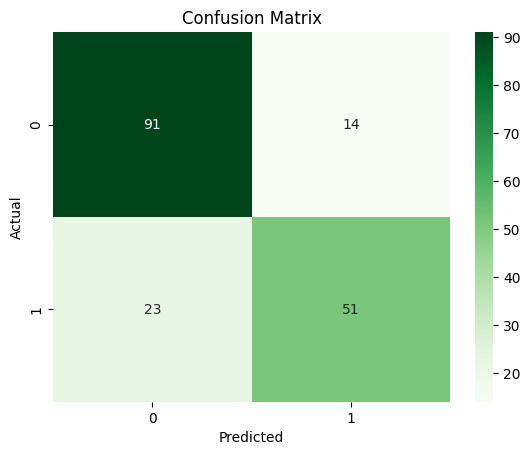

In [192]:
# Plot confusion matrix
conf_matrix5 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic regrassion whith coeffitions after Grid Seach  with scaled data

In [193]:
model4 =LogisticRegression(C=10,solver="saga",tol=0.0001)
model4.fit(Features4_train,target4_train)
model4_Pred=model4.predict(Features4_test)
model4_Pred_Train=model4.predict(Features4_train)
print(model4.score(X1, y1))

0.7991021324354658


In [194]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", len(y_train))
print("y_test shape:", len(y_test))

X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: 712
y_test shape: 179


In [195]:
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y1_train shape:", len(y1_train))
print("y1_test shape:", len(y1_test))

X1_train shape: (712, 8)
X1_test shape: (179, 8)
y1_train shape: 712
y1_test shape: 179


In [196]:
print("Features4_train_train shape:", Features4_train.shape)
print("Features4_test shape:", Features4_test.shape)
print("target4_train shape:", len(target4_train))
print("target4_test shape:", len(target4_test))

Features4_train_train shape: (712, 8)
Features4_test shape: (179, 8)
target4_train shape: 712
target4_test shape: 179


In [197]:
print("Features5_train_train shape:", Features5_train.shape)
print("Features5_test shape:", Features5_test.shape)
print("target5_train shape:", len(target5_train))
print("target5_test shape:", len(target5_test))

Features5_train_train shape: (712, 8)
Features5_test shape: (179, 8)
target5_train shape: 712
target5_test shape: 179


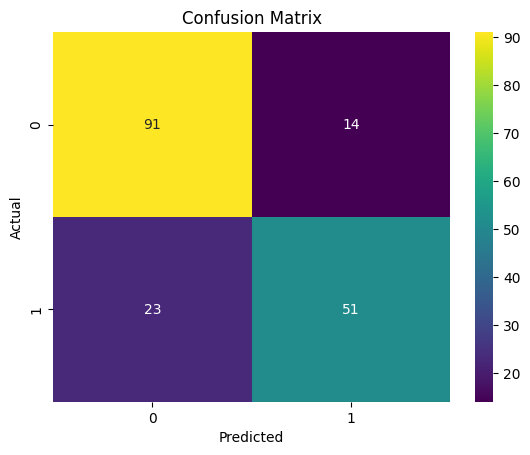

In [198]:
# Plot confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0.7152509652509652


C:\Users\shvve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


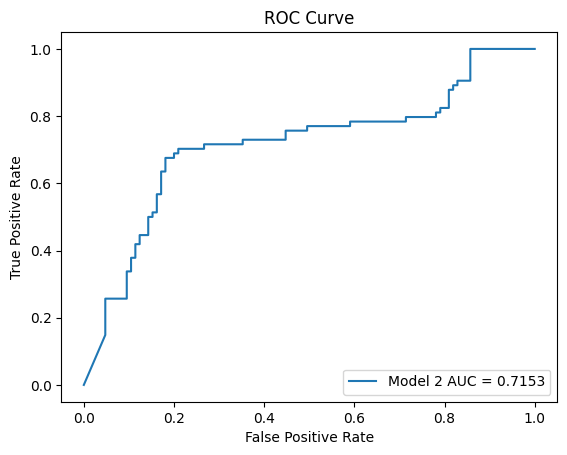

In [199]:
# Use predict_proba to get probabilities for the positive class

target5_prob=model4.predict_proba(Features5_test)[:, 1]
# Compute ROC curve

fpr1, tpr1, _ = metrics.roc_curve(target5_test, target5_prob)
# Compute AUC

auc1 = metrics.roc_auc_score(target5_test, target5_prob)
print(auc1)
# Plot ROC curve

plt.plot(fpr1, tpr1, label="Model 2 AUC = " + str(round(auc1, 4)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()

Try to fit and analyse Model  KNeighborsClassifier

In [200]:
Features4=scaled_data.drop(columns=0)
target4=scaled_data[0]

In [201]:
KNN=KNeighborsClassifier()
KNN_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40]
}

# Perform GridSearchCV
GRS = GridSearchCV(KNN, KNN_params, cv=5, scoring='accuracy')  # Scoring metric can be changed if needed
GRS.fit(X1_train, y1_train.to_numpy().ravel())


print(GRS.best_params_)
print(GRS.best_score_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'uniform'}
0.7879346006106569


In [202]:
KNN=KNeighborsClassifier(algorithm="brute",leaf_size=10,n_neighbors=3,weights="uniform")
KNN.fit(X1_train, y1_train.to_numpy().ravel())
KNN_Pred=KNN.predict(X1_test)
KNN_Pred_Train=KNN.predict(X1_train)

In [203]:
print("Classification Report for the test group : \n")
print(classification_report(y1_test,KNN_Pred),"\n\n")
print("Classification Report for the train group (to check if there is any overfitting): \n")
print(classification_report(y1_train,KNN_Pred_Train),"\n\n")

Classification Report for the test group : 

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       105
         1.0       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179
 


Classification Report for the train group (to check if there is any overfitting): 

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       444
         1.0       0.87      0.78      0.82       268

    accuracy                           0.87       712
   macro avg       0.87      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712
 




[[93 12]
 [19 55]]


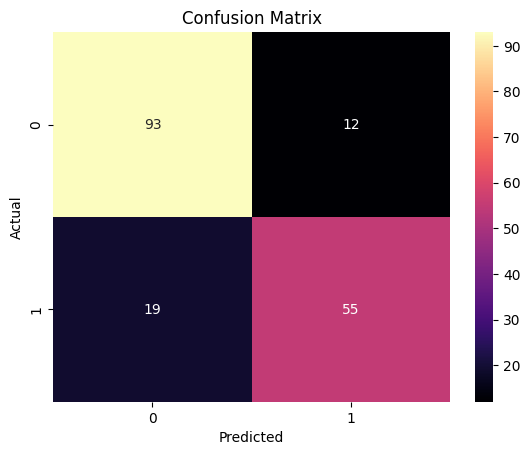

In [204]:

CM_KNN=confusion_matrix(y1_test,KNN_Pred)
print(CM_KNN)
sns.heatmap(CM_KNN,annot=True,cmap="magma")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

AUC: 0.8404118404118404


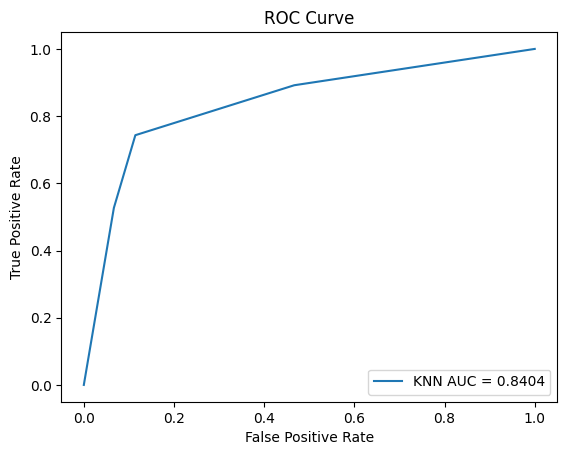

In [205]:
# Use predict_proba to get probabilities for the positive class

y1_prob = KNN.predict_proba(X1_test)[:, 1]  # Input should be X1_test, not y1_test

# Compute ROC curve
fpr1, tpr1, _ = roc_curve(y1_test, y1_prob)

# Compute AUC
auc1 = roc_auc_score(y1_test, y1_prob)
print("AUC:", auc1)

# Plot ROC curve
plt.plot(fpr1, tpr1, label="KNN AUC = " + str(round(auc1, 4)))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc=4)
plt.show()